C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:14: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)
C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Unnamed: 22', 'fulfilled-by'], errors='ignore', inplace=True)  # Drop unwanted columns
C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'],

Data Loaded Successfully
Columns in the dataset: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')


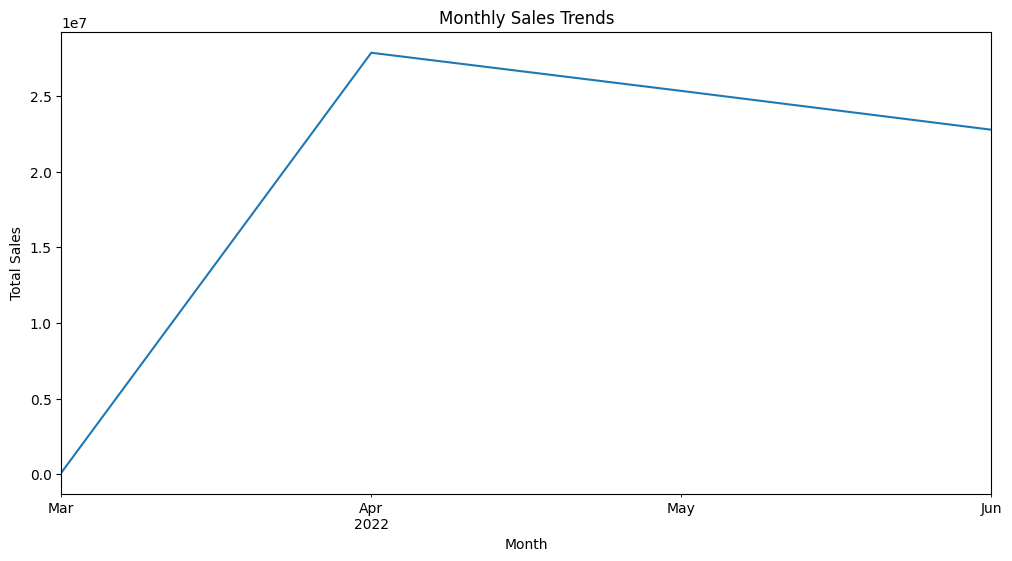

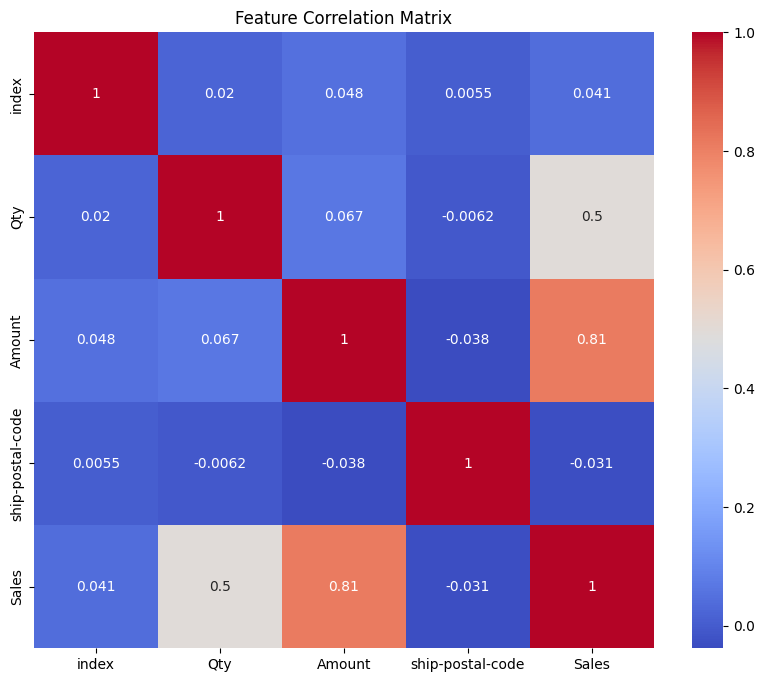

C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year
C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data.index.month
C:\Users\ROG\AppData\Local\Temp\ipykernel_7580\3394543626.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

R^2 Score: 0.9998582016098537
Mean Squared Error: 15.33600616438356


In [19]:
def preprocess_data(data):
    """
    Preprocess the data by handling missing values, converting dates, and engineering features.
    """
    data = data.dropna(subset=['Amount', 'Qty'])  # Ensure sales data completeness
    data.drop(columns=['Unnamed: 22', 'fulfilled-by'], errors='ignore', inplace=True)  # Drop unwanted columns
    data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y', errors='coerce')  # Correct date format
    data.ffill(inplace=True)  # Handle remaining missing values
    
    # Feature Engineering
    data['is_weekend'] = data['Date'].dt.dayofweek >= 5
    data['quarter'] = data['Date'].dt.quarter
    data['month'] = data['Date'].dt.month
    data['year'] = data['Date'].dt.year
    data['Sales'] = data['Qty'] * data['Amount']  # Calculate Sales
    return data

def product_trends(data):
    """
    Analyze trends for individual products or categories.
    """
    # Group by Category and calculate total sales
    category_sales = data.groupby('Category')['Sales'].sum().sort_values(ascending=False)
    plt.figure(figsize=(12, 6))
    category_sales.plot(kind='bar', title='Sales by Category')
    plt.xlabel('Category')
    plt.ylabel('Total Sales')
    plt.show()

    # Group by SKU and calculate total sales
    sku_sales = data.groupby('SKU')['Sales'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sku_sales.plot(kind='bar', title='Top 10 SKUs by Sales')
    plt.xlabel('SKU')
    plt.ylabel('Total Sales')
    plt.show()

def advanced_eda(data):
    """
    Perform advanced exploratory data analysis to identify trends and patterns.
    """
    data.set_index('Date', inplace=True)
    monthly_sales = data['Sales'].resample('M').sum()

    # Monthly sales trends
    plt.figure(figsize=(12, 6))
    monthly_sales.plot(title='Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.show()

    # Correlation Matrix
    numeric_data = data[['Qty', 'Amount', 'Sales', 'is_weekend', 'quarter', 'month', 'year']]
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Feature Correlation Matrix')
    plt.show()

def forecast_sales(data):
    """
    Forecast future sales using RandomForestRegressor.
    """
    X = data[['Qty', 'Amount', 'is_weekend', 'quarter', 'month', 'year']]
    y = data['Sales']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    print("R^2 Score:", r2_score(y_test, predictions))
    print("Mean Squared Error:", mean_squared_error(y_test, predictions))

    # Feature Importances
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
    plt.title('Feature Importances')
    plt.show()

def main():
    filepath = 'Amazon_Sale_Report.csv'
    data = load_data(filepath)
    data_preprocessed = preprocess_data(data)
    product_trends(data_preprocessed)  # New function for product-level analysis
    advanced_eda(data_preprocessed)
    forecast_sales(data_preprocessed)

if __name__ == "__main__":
    main()
